In [35]:
#Description : This is a sentiment anaylysis program that parses the tweets fetced from Twitter using Python 

In [36]:
 # Import the libraries 
 import tweepy 
 from textblob import TextBlob
 from wordcloud import WordCloud
 import pandas as pd
 import os
 import numpy as np
 import re 
 import matplotlib.pyplot as plt
 plt.style.use('fivethirtyeight')

In [60]:
#Get the twitter API credentials
consumer_key = 'ux908IACcA4TIfZg5OuIoCZg2'
consumer_secret='tDDc5wVeqtBnMEtXxFVwDgWEhk5ApyNocyasjqvw0EINGIFpox'
access_token = "796976210-DwytclPUkalTuwJgF32ReDJXcqzXP9nOzhKeouc8"
access_token_secret = "rpp74C1JW1hSISoeGotFZDWkpK1uNAi9FWc8Kq45KFnF8"



In [41]:
# create the authentaction object
authenticate = tweepy.OAuthHandler(consumer_key,consumer_secret)
#set the access token and access secret
authenticate.set_access_token (access_token, access_token_secret)
#create the API object
api= tweepy.API(authenticate, wait_on_rate_limit= True)



In [42]:
#Gather 2000 tweets about Bitcoin and filter out any retweets 'RT'
search_term= '#bitcoin -filter:retweets'
#Create a cursor object
tweets= tweepy.Cursor(api.search, q=search_term, lang= 'en', since= '2019-11-01', tweet_mode= 'extended').items(2000)
#Store the tweets in a variable and get the full text
all_tweets= [tweet.full_text for tweet in tweets]

In [43]:
#Create a dataframe to store the tweets with a column called 'Tweets'
df= pd.DataFrame(all_tweets, columns= ['Tweets'])
#Show the first five rows of data
df.head(10)

,Tweets
0,@binance Remember this next time when a dumb s...
1,#Bitcoin Last Price $19068 #BTC 🚀\nWeekly Indi...
2,#FREE BITCOIN SIMPLY PLAY AND #EarnMoneyOnline...
3,Current #Cardano price Alert: \n\n#ADA $0.46 U...
4,@mosspuppet @pianomikey1 @SilvermanJacob Value...
5,#cryptocurrencies ↘️ after yesterday's 🚀\n\n$B...
6,"@esatoshiclub 2027 #bitcoin crashes below $30,000"
7,#crypto #bitcoin #altcoin #NFTs #btc #eth #xrp...
8,Cryptocurrency is developing industry in which...
9,#Bitcoin laser eyes represent just how sharply...


In [44]:
#Create a function to clean the tweets
def cleanTwt(twt):
 twt = re.sub ('#bitcoin', 'bitcoin', twt) # Removes the '#'from bitcoin
 twt = re.sub ('#Bitcoin', 'Bitcoin', twt) # Removes the '#'from Bitcoin
 twt = re.sub ('#[A-Za-z0-9]+', '', twt) # Removes any strings with a '#'
 twt = re.sub ('#[A-Za-z0-9]+', '', twt) # Removes any strings with a '#'
 twt = re.sub ('\\n', '', twt) # Removes the '\n' string
 twt = re.sub ('https?:\/\/\S+', '', twt) # Removes any hyperlinks
 return twt

In [45]:
# Clean the Tweets
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
# Show the dataset
df.head(5)

,Tweets,Cleaned_Tweets
0,@binance Remember this next time when a dumb s...,@binance Remember this next time when a dumb s...
1,#Bitcoin Last Price $19068 #BTC 🚀\nWeekly Indi...,Bitcoin Last Price $19068 🚀Weekly Indicators:...
2,#FREE BITCOIN SIMPLY PLAY AND #EarnMoneyOnline...,"BITCOIN SIMPLY PLAY AND ,YOU NEED A WALET I ..."
3,Current #Cardano price Alert: \n\n#ADA $0.46 U...,Current price Alert: $0.46 USDBitcoin 2.4112...
4,@mosspuppet @pianomikey1 @SilvermanJacob Value...,@mosspuppet @pianomikey1 @SilvermanJacob Value...


In [47]:
# Create a Function to get the subjectivity 
def getsubjectvity(twt):
  return TextBlob(twt).sentiment.subjectivity



In [48]:
# Create a function to get polarity 
def getpolarity(twt):
  return TextBlob(twt).sentiment.polarity

In [50]:
# Create two new columns called 'Subjectivity' and 'Polarity'
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getsubjectvity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getpolarity)

# Show the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,@binance Remember this next time when a dumb s...,@binance Remember this next time when a dumb s...,0.425000,0.1875
1,#Bitcoin Last Price $19068 #BTC 🚀\nWeekly Indi...,Bitcoin Last Price $19068 🚀Weekly Indicators:...,0.044444,0.0000
2,#FREE BITCOIN SIMPLY PLAY AND #EarnMoneyOnline...,"BITCOIN SIMPLY PLAY AND ,YOU NEED A WALET I ...",0.357143,0.0000
3,Current #Cardano price Alert: \n\n#ADA $0.46 U...,Current price Alert: $0.46 USDBitcoin 2.4112...,0.325000,0.0000
4,@mosspuppet @pianomikey1 @SilvermanJacob Value...,@mosspuppet @pianomikey1 @SilvermanJacob Value...,0.000000,0.0000


In [51]:
# Create a function to get the text sentiment 
def getsentiment(score):
  if score < 0:
   return 'negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [52]:
from textblob.en import polarity
# Create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getsentiment)
# Show the data
df.head()


,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,@binance Remember this next time when a dumb s...,@binance Remember this next time when a dumb s...,0.425000,0.1875,Positive
1,#Bitcoin Last Price $19068 #BTC 🚀\nWeekly Indi...,Bitcoin Last Price $19068 🚀Weekly Indicators:...,0.044444,0.0000,Neutral
2,#FREE BITCOIN SIMPLY PLAY AND #EarnMoneyOnline...,"BITCOIN SIMPLY PLAY AND ,YOU NEED A WALET I ...",0.357143,0.0000,Neutral
3,Current #Cardano price Alert: \n\n#ADA $0.46 U...,Current price Alert: $0.46 USDBitcoin 2.4112...,0.325000,0.0000,Neutral
4,@mosspuppet @pianomikey1 @SilvermanJacob Value...,@mosspuppet @pianomikey1 @SilvermanJacob Value...,0.000000,0.0000,Neutral


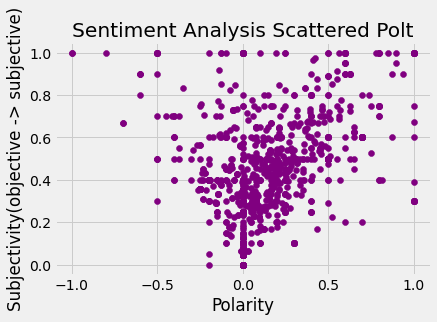

In [58]:
# create a scattered plot to show the subjectivity & polarity
plt.Figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color= 'purple')
plt.title('Sentiment Analysis Scattered Polt')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity(objective -> subjective)')  
plt.show()

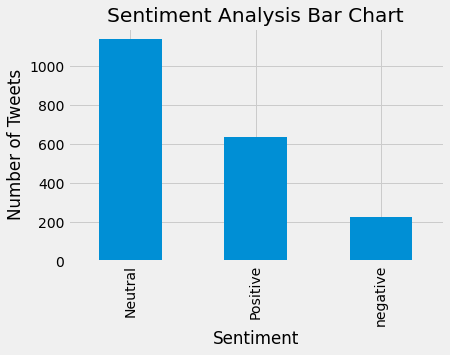

In [59]:
# Create a bar chart to show the count of positive, Neutral & Negative Sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Chart')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')  
plt.show()